Install necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# seaborn was built from matplotlib.
# matplotlib is used for simple plotting while seaborn is used for advanced plotting 

first step: Load the data

In [5]:
df = pd.read_csv('/Users/romualdchristialtcheutchoua/Desktop/General/FlipRobo_Internshipp/Project-discussion-data/TSLA--1-.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


Second step: give the meaning of each variables in the data, understand the problem statement (what should be 
considered or what does the project or data imposes us to observed throughout the project process, etc.), what is the objective of the project (describe in a comprehensive way)and select which is the target variable for the project

Third step: start understanding the data

In [8]:
# checking the dimensions of the data
df.shape

(2416, 7)

In [10]:
# checking the data present in the first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [11]:
# checking the data present in the last 5 rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


Here it is important to check max and min date, as other features and target vary and are limited by date

In [13]:
print('Max Dateis: ', df['Date'].max())
print('Min Dateis: ', df['Date'].min())

Max Dateis:  2020-02-03
Min Dateis:  2010-06-29


In [12]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Here Date is considered as object, but it is the wrong data type for date

Let's convert date into the right dtype/format 

Checking null values

In [14]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
no_null_col = []
for i in df.columns:
    if i != []:
        no_null_col.append(i)

In [18]:
no_null_col

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


<AxesSubplot:>

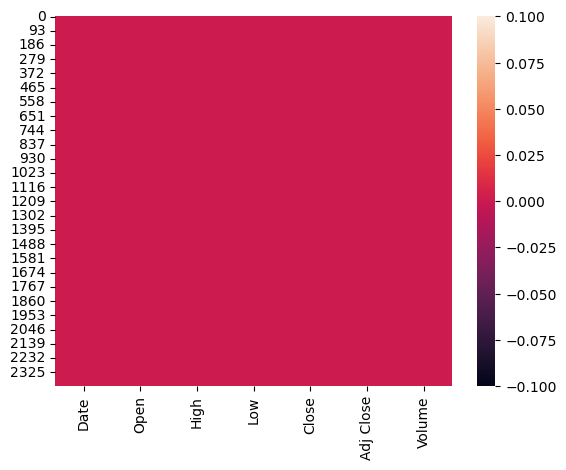

In [20]:
# visualizing with heatmap (in checking for null values)
sns.heatmap(df.isna())

In [24]:
# converting date to datetime format

df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')



This can be done by defining a function 

In [29]:
"""def r_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['date'] = pd.to_datetime(df['Date']).dt.day
    df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek
    df = df.drop(['Date'], axis = 1, inplace = True)
    return df
df_date = r_date(df)"""

"def r_date(df):\n    df['Date'] = pd.to_datetime(df['Date'])\n    df['Year'] = pd.to_datetime(df['Date']).dt.year\n    df['Month'] = pd.to_datetime(df['Date']).dt.month\n    df['date'] = pd.to_datetime(df['Date']).dt.day\n    df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek\n    df = df.drop(['Date'], axis = 1, inplace = True)\n    return df\ndf_date = r_date(df)"

here, datetime doesn’t take 'inplace' argument, so we have to recreate the column 'Date' (with the right 
format) so that this can be changed permanently. (if we want to change the format and in the same time change the name of the Date, we could do it here simultaneously) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


Here, it is important to set 'Date' as index column (primary key) because vlaues are uniques and it can be 
considered as reference for other colunm (they change and are limited by 'Date')

In [26]:
# set date as index
df.set_index('Date', inplace = True)

In [30]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [41]:
df.iloc[0,:]

Open         1.900000e+01
High         2.500000e+01
Low          1.754000e+01
Close        2.389000e+01
Adj Close    2.389000e+01
Volume       1.876630e+07
Name: 2010-06-29 00:00:00, dtype: float64

In [43]:
df.nunique().to_frame('No unique values')

,No unique values
Open,2132
High,2128
Low,2136
Close,2225
Adj Close,2225
Volume,2391


In [45]:
# Checking the value counts of each column (frequency of each unique value for each column)

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

30.000000     6
28.000000     6
28.500000     5
220.000000    5
360.000000    4
             ..
210.050003    1
205.809998    1
226.009995    1
230.300003    1
673.690002    1
Name: Open, Length: 2132, dtype: int64


34.500000     7
28.000000     7
30.000000     7
27.000000     6
34.799999     5
             ..
225.490005    1
206.789993    1
209.880005    1
205.000000    1
786.140015    1
Name: High, Length: 2128, dtype: int64


27.299999     6
28.000000     6
203.000000    5
27.900000     4
28.250000     4
             ..
232.429993    1
236.059998    1
244.410004    1
249.449997    1
673.520020    1
Name: Low, Length: 2136, dtype: int64


27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.979996    1
237.789993    1
780.000000    1
Name: Close, Length: 2225, dtype: int64


27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.

We can see that the exact data are present in the columns 'Close' and 'Adj Close'. So we will drop Adj Close column

In [46]:
# dropping Adj Close
d = df.drop('Adj Close', axis =1)

This removes the column and keeps the modified data in the object 'd' but doesn’t change df

In [47]:
# dropping Adj Close

df.drop('Adj Close', axis =1, inplace = True)

This deletes the column permanently from df (so df is changed and doesn’t contain the column anymore)

In [48]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


Cheking duplicates

In [53]:
print('Total number of duplicate rows is: ', df.duplicated().sum())

Total number of duplicate rows is:  0


This means: whereever there is duplicate, keep the first row and drop others

In [61]:
df.drop_duplicates(inplace = True)
# another way to delete duplicates

# # Description of the dataset

In [54]:
df.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


Here we have to interprete/document row/line by row/line for each column

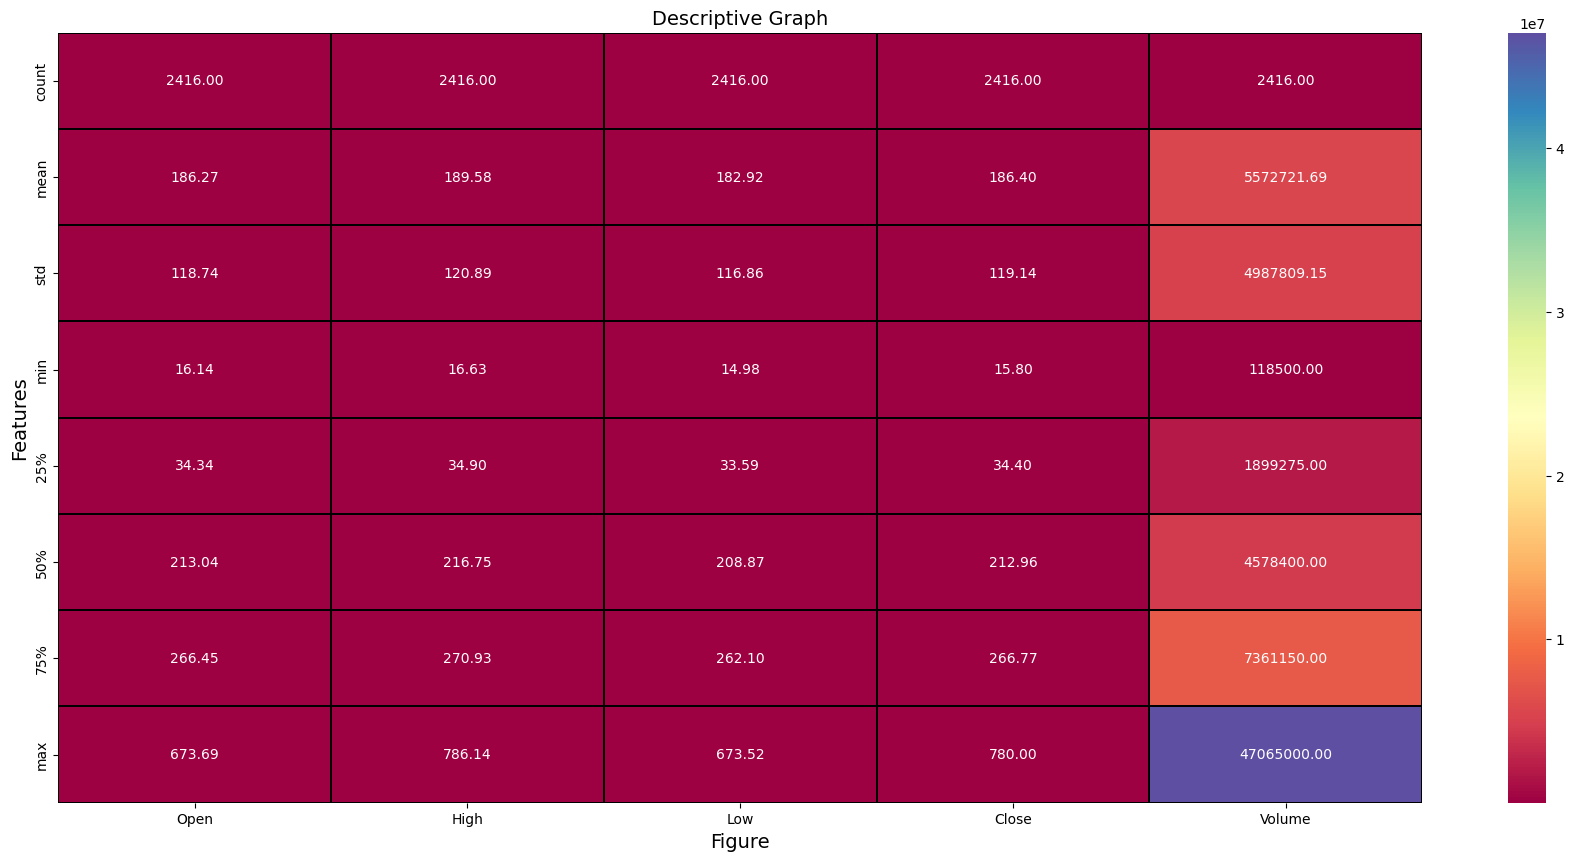

In [66]:
# applying heatmap for describe method (describe dataset)

plt.figure(figsize = (22,10))

sns.heatmap(df.describe(), annot = True, fmt = '0.2f', linewidth = 0.2, linecolor = 'black', cmap = 'Spectral')
plt.xlabel('Figure', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.title('Descriptive Graph', fontsize = 14)
plt.show()


List of available color for this kind of grapgh (hatmap, describe): 'Accent', 'Accent_r', 'Blues', 'Blues_r', 
'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 
'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3'
, 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 
'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 
'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 
'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 
'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 
'winter_r'


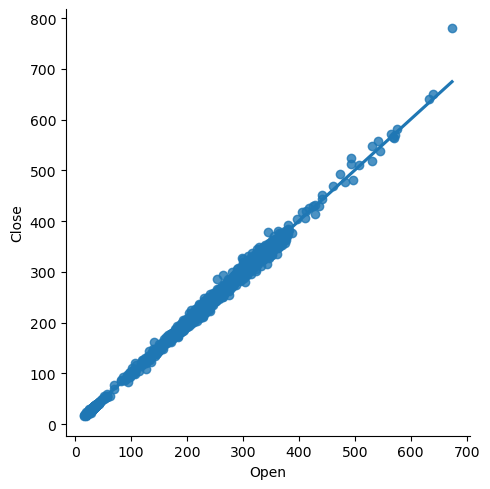

In [71]:
sns.lmplot(x = 'Open', y = 'Close', data = df, palette = 'colorblind')

Here, the advantage of lmplot is that it has the capacity to combine a principal plot with many subplots using 
FacetGrid (it shows manybrelationships between variables, not just two. This thus shows the impact of diiferent variables). here, it combines scatter plot(principal) relevantly with the best fit line (subplot). (Relevantly:using FacetGrid it automatically created the best fit line because we have 2 axis(x&y) with numeric/integer data). 'hue' could be used here, but we are not using because it has too many uniques values, so the graph may not be able to plot them all in a visible way

the graph show that there is a strong relationship between Open and Close

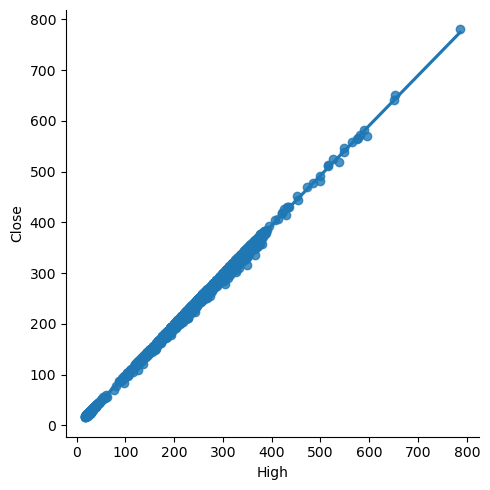

In [72]:
sns.lmplot(x = 'High', y = 'Close', data = df, palette = 'colorblind')

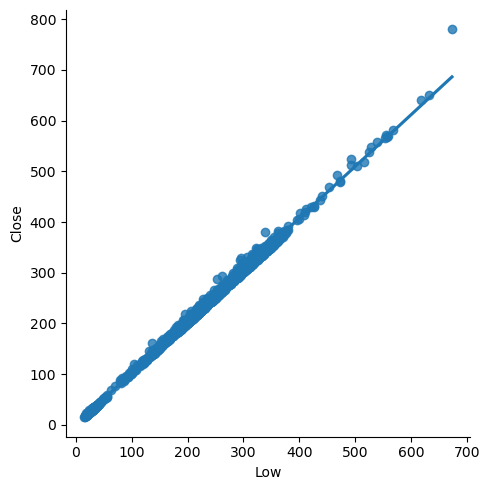

In [73]:
sns.lmplot(x = 'Low', y = 'Close', data = df, palette = 'colorblind')

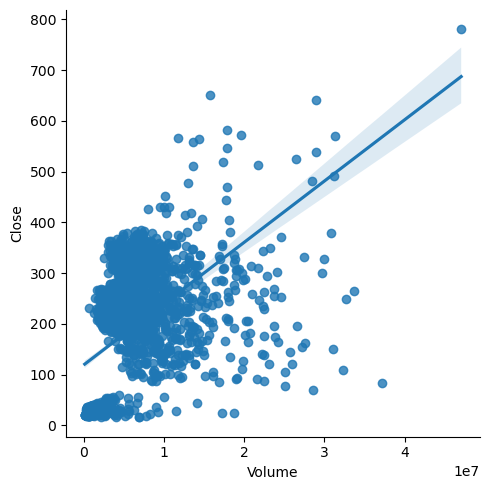

In [74]:
sns.lmplot(x = 'Volume', y = 'Close', data = df, palette = 'colorblind')

The shadow-area around the best fit line is highlighting the presence of FacetGrid

There is a positive relationship between Close and Volume, but not a strong relationship 

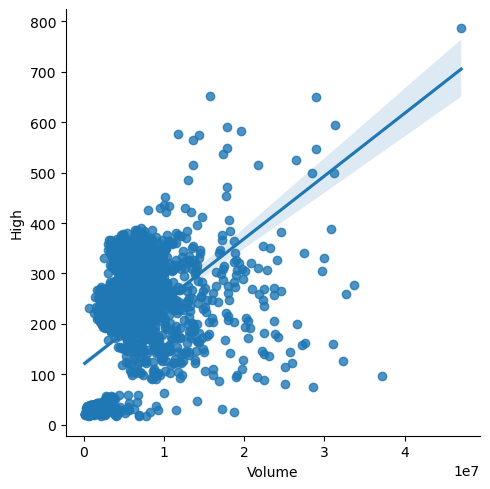

In [75]:
sns.lmplot(x = 'Volume', y = 'High', data = df, palette = 'colorblind')

There is a positive relationship between High and Volume, but not a strong relationship

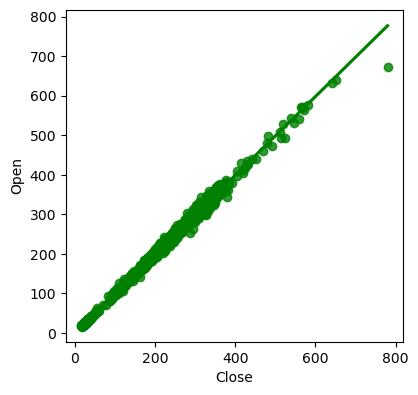

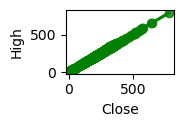

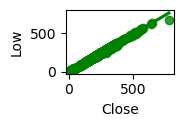

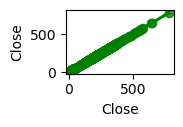

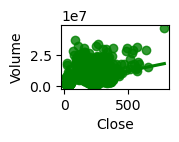

In [79]:
plt.figure(figsize = (20, 25))

p = 1
for i in df:
    if p<=17:
        plt.subplot(5,4, p)
        sns.regplot(x = 'Close', y = i, data = df, color = 'g')
        plt.xlabel('Close')
        plt.ylabel(i)
    p+=1  # if we don’t incrememt, the loop will keep executing indefinitely 
    
    plt.show()

regplot is just regression trend between just two variables. it cannot show multiples relationships and imapct 
as lmplot does.

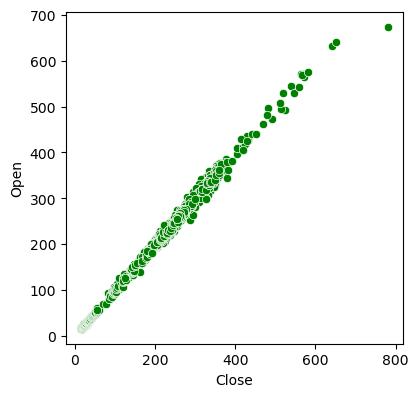

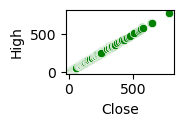

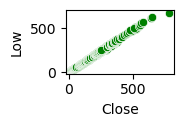

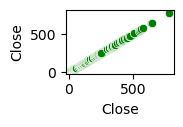

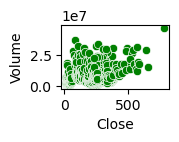

In [80]:
plt.figure(figsize = (20, 25))

p = 1
for i in df:
    if p<=17:
        plt.subplot(5,4, p)
        sns.scatterplot(x = 'Close', y = i, data = df, color = 'g')
        plt.xlabel('Close')
        plt.ylabel(i)
    p+=1  # if we don’t incrememt, the loop will keep executing indefinitely 
    
    plt.show()

Scatter plot = regplot -best fit line. It shows the relationship but not the best fit line

In [ ]:
plt.figure(figsize = (20, 25))

p = 1
for i in df:
    if p<=17:
        plt.subplot(5,4, p)
        sns.regplot(x = 'Close', y = i, data = df, color = 'g')
        plt.xlabel('Close')
        plt.ylabel(i)
    p+=1  # if we don’t incrememt, the loop will keep executing indefinitely 
    
    plt.show()

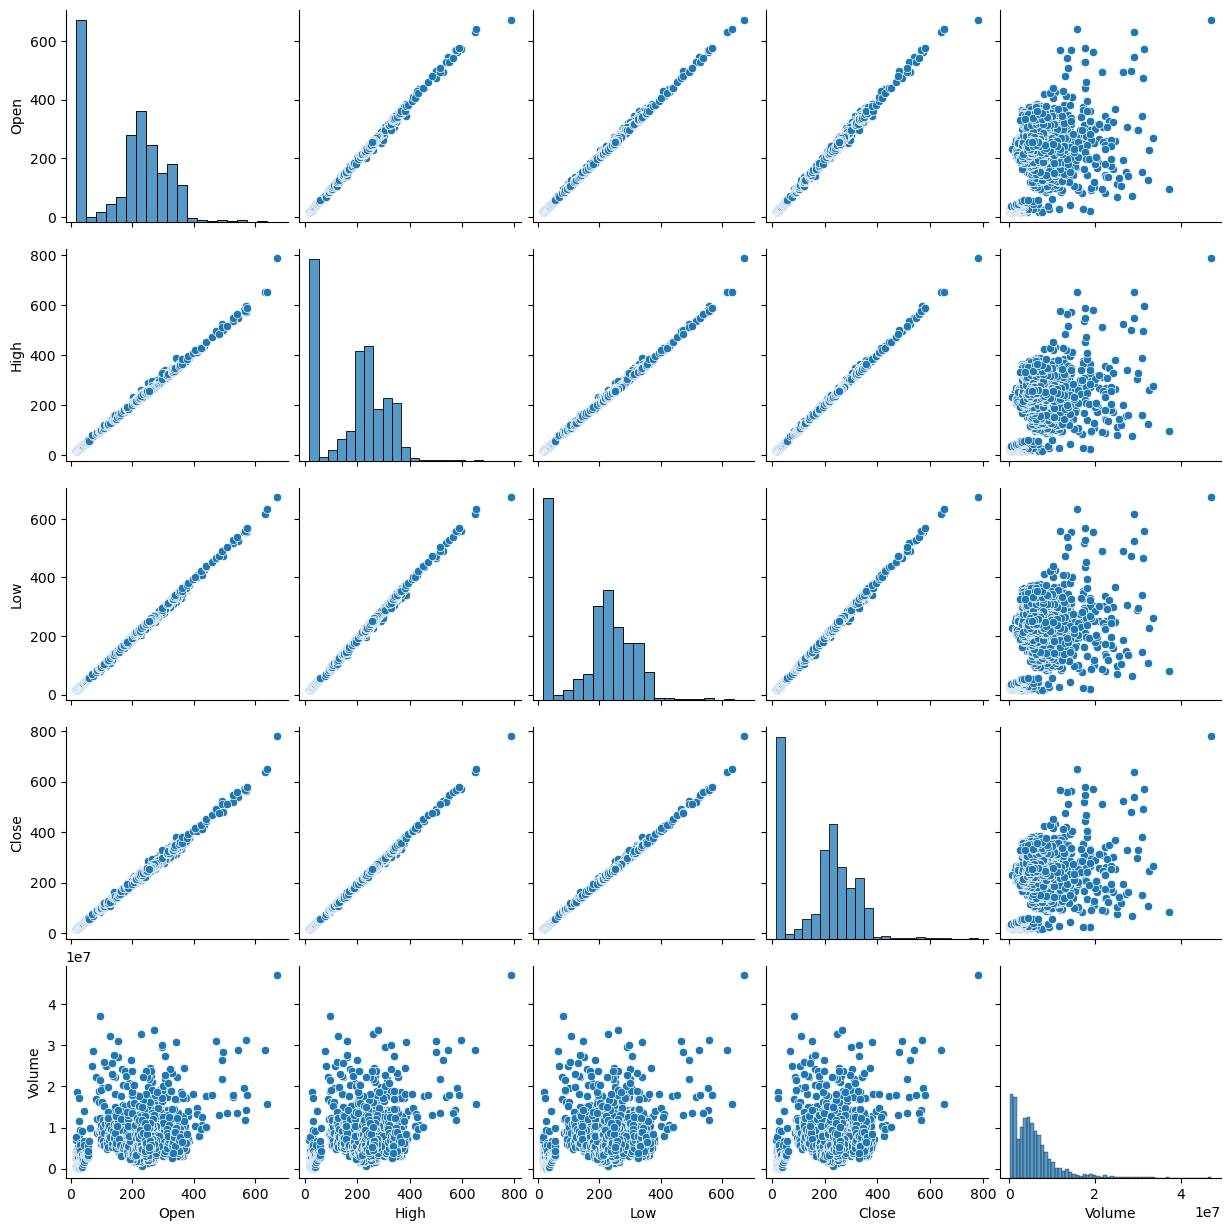

In [82]:
sns.pairplot(data = df, palette = 'Dark2')

Pairplot = scatterplot + distribution of each variable(diagonale) + finding outliers (distribution allows 
to check outliers)

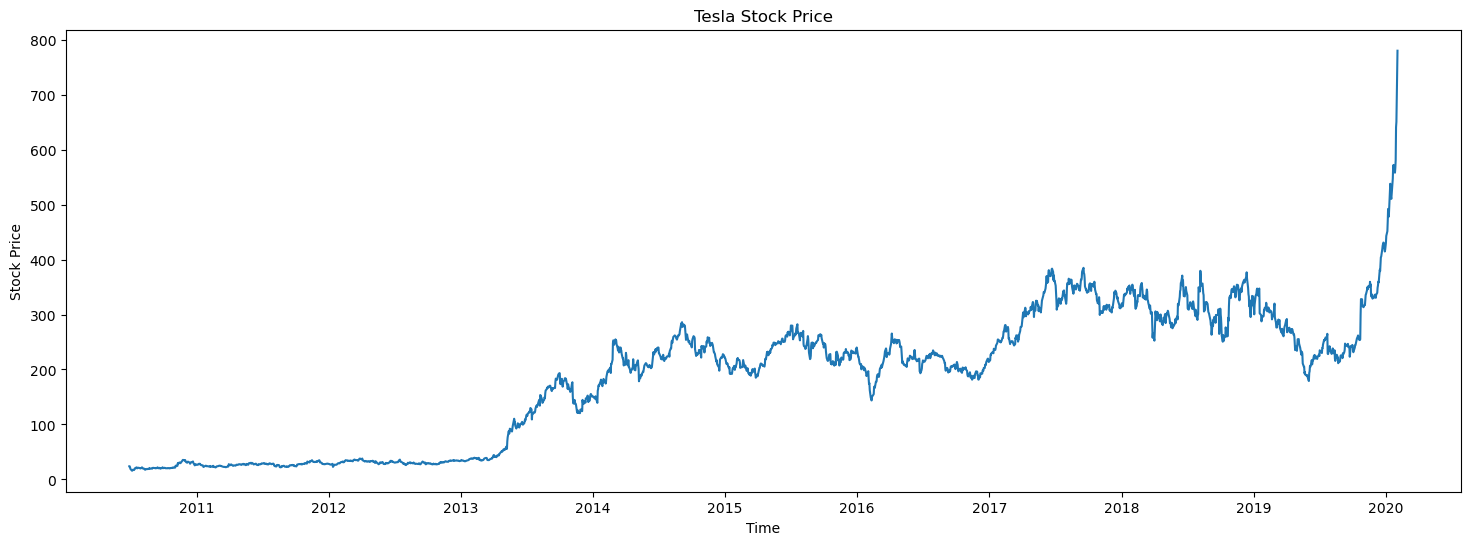

In [84]:
plt.figure(figsize = (18, 6))
plt.plot(df.Close, label = 'closing price')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('Tesla Stock Price')
plt.show()

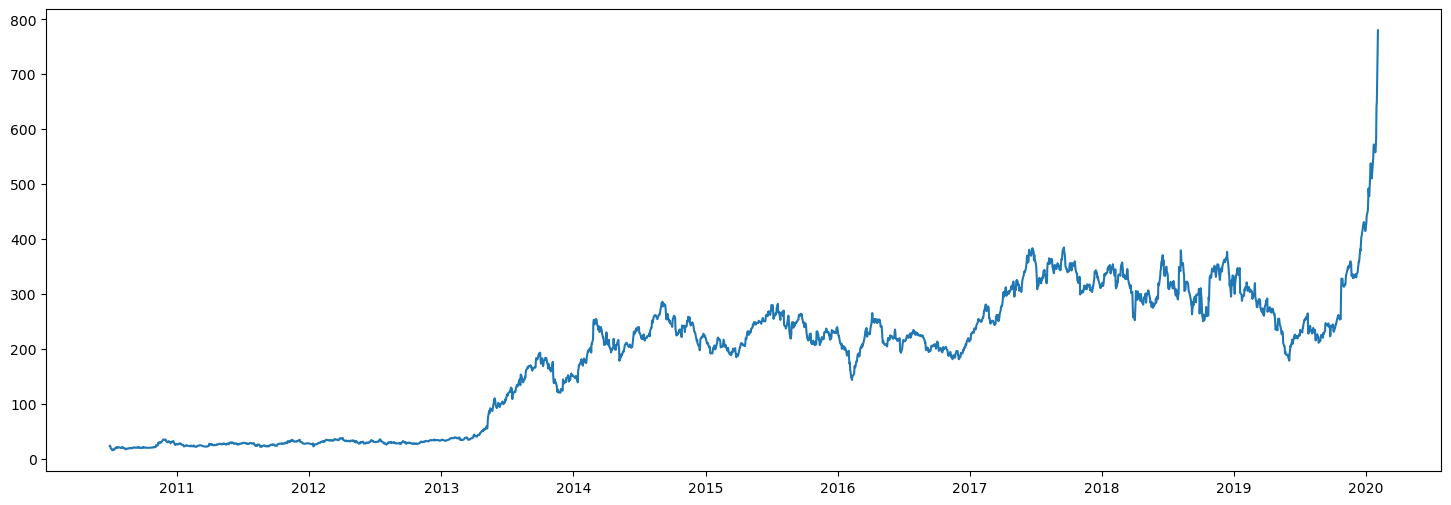

In [85]:
plt.figure(figsize = (18, 6))
plt.plot(df.Close)

It is line plot

Text(0.5, 1.0, 'The general trend of all values')

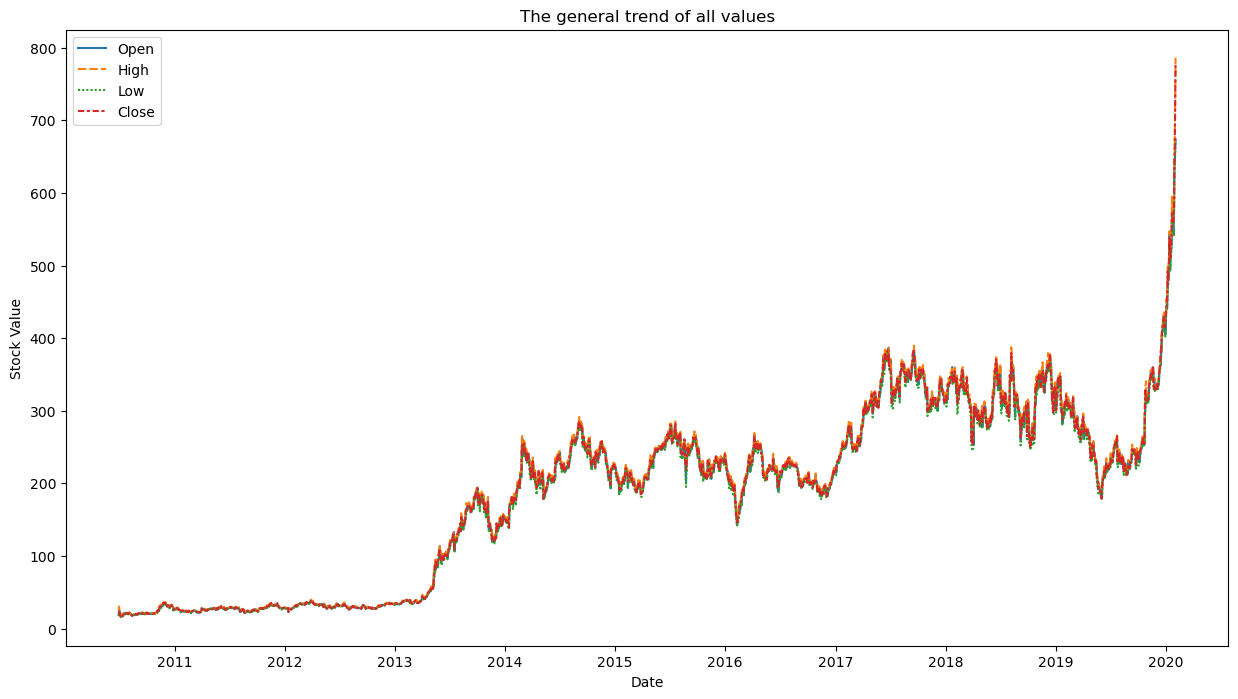

In [87]:
plt.figure(figsize = (15, 8))
sns.lineplot(data=df.iloc[:,:-1]) # select all columns except volume
plt.ylabel('Stock Value')
plt.title('The general trend of all values')


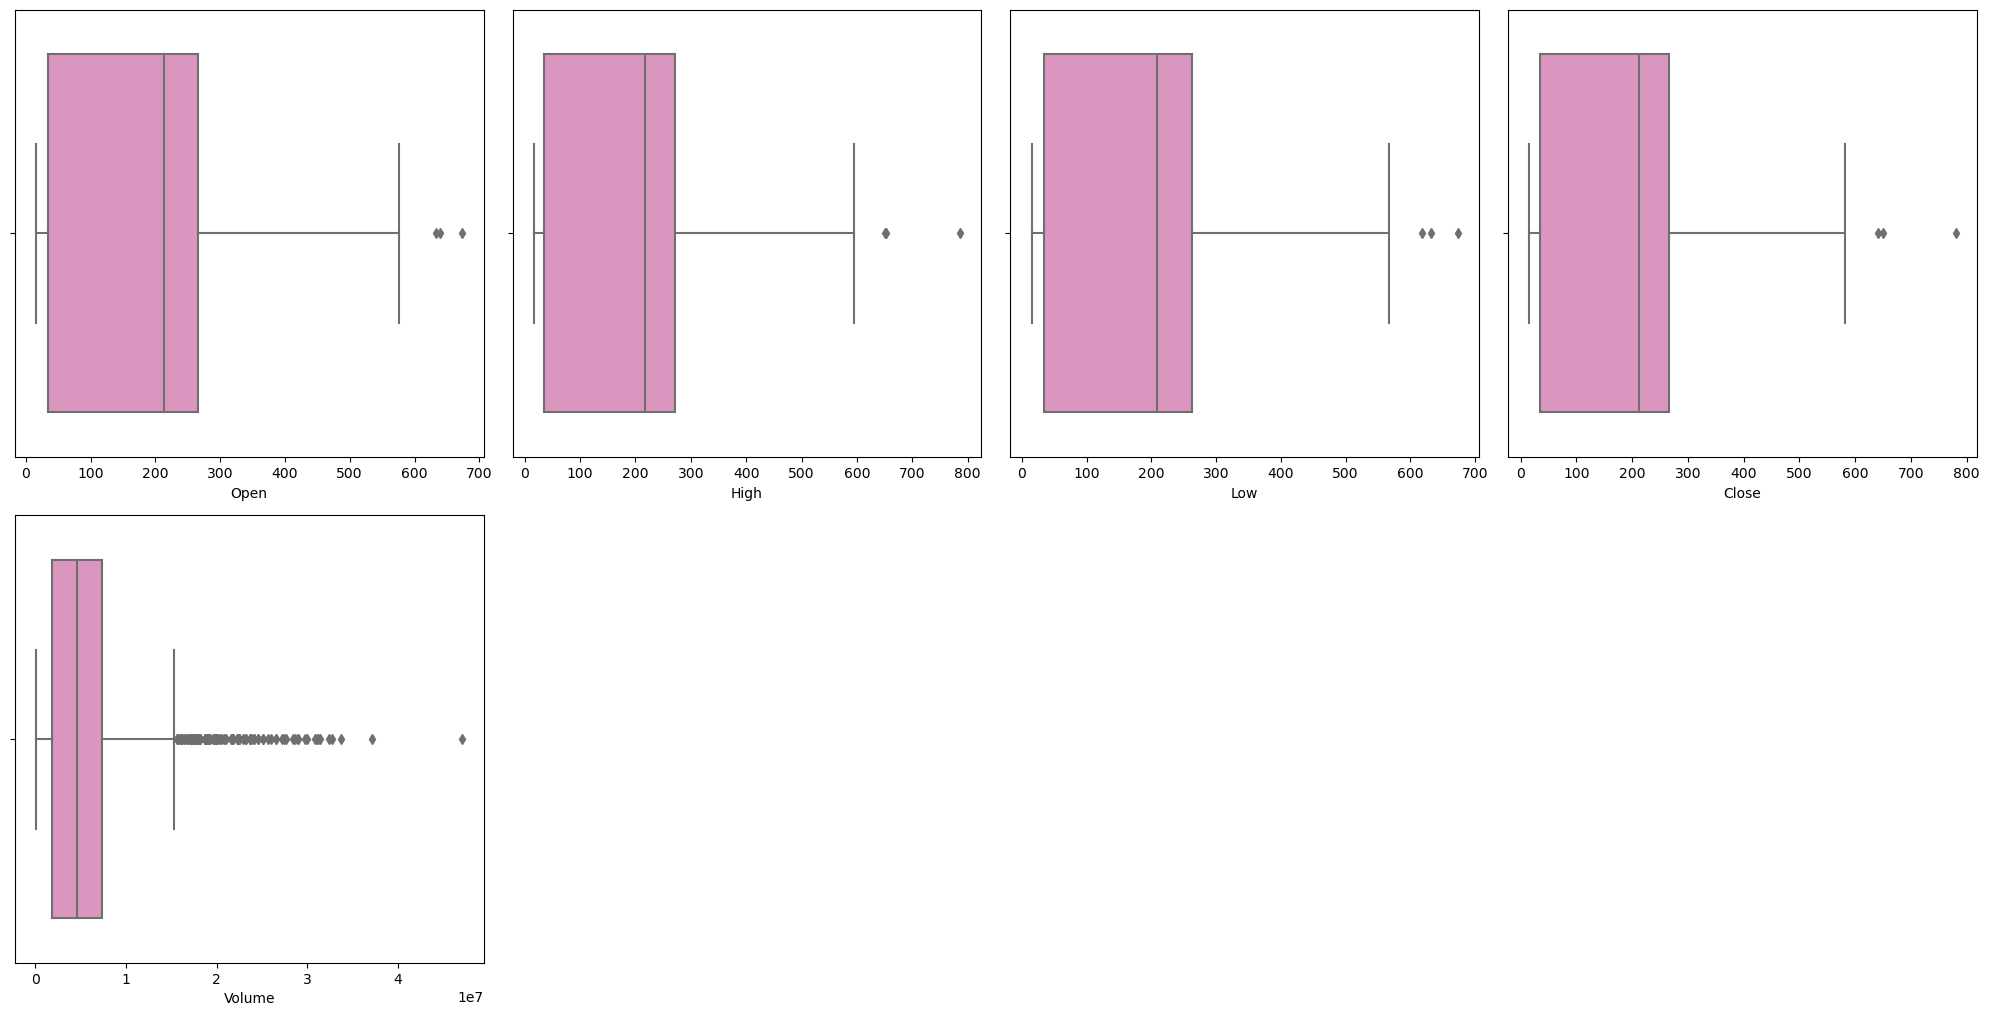

In [112]:
plt.figure(figsize = (20, 25))

p = 1
for i in df:
    if p<=13:
        plt.subplot(5,4, p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1  # if we don’t incrememt, the loop will keep executing indefinitely 
    
    plt.tight_layout()

Checking for outliers using z score

In [89]:
from scipy.stats import zscore

features = df[['Open', 'High', 'Low', 'Volume']]
z = np.abs(zscore(features))
z

,Open,High,Low,Volume
Date,,,,
2010-06-29,1.409007,1.361644,1.415491,2.645713
2010-06-30,1.351812,1.316801,1.366190,2.329035
2010-07-01,1.358466,1.354032,1.392124,0.530619
2010-07-02,1.375313,1.377364,1.405477,0.086814
2010-07-06,1.400584,1.403012,1.430127,0.259522
...,...,...,...,...
2020-01-28,3.219618,3.203776,3.211097,1.246452
2020-01-29,3.280267,3.311249,3.291125,2.452241
2020-01-30,3.758132,3.816597,3.723964,4.699023


For z between -3 and 3, 99.7% of the data lies within the bell shape curve (normally distributed). any data outside this range is considered as outliers

We only check on the feature columns as we have 'not to' check the taget variable.

In [90]:
# threshold = 3
np.where(z>3)

(array([ 720,  721,  722,  723,  725,  733,  766,  767,  783,  795,  821,
         822,  845,  846,  847,  848,  854,  864,  892,  920,  921, 1506,
        1950, 2002, 2038, 2041, 2042, 2063, 2078, 2079, 2097, 2098, 2154,
        2182, 2206, 2220, 2221, 2226, 2240, 2283, 2347, 2348, 2398, 2399,
        2401, 2402, 2402, 2404, 2407, 2407, 2407, 2407, 2408, 2408, 2408,
        2409, 2409, 2409, 2410, 2410, 2411, 2411, 2411, 2412, 2412, 2412,
        2413, 2413, 2413, 2413, 2414, 2414, 2414, 2415, 2415, 2415, 2415]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 0, 3, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3]))

Here, the first array is row numbers/indice and the second array is column numbers/indices

In [91]:
z.iloc[723,3] # row 723 and column 3

6.3349894289721185

(1) .iloc[a,:] : row a and all the columns
(2) .iloc[a,b] : row a and column b
(3) .iloc[a:b,:] : from row a to row b, and all the columns
(4) .iloc[:b,:]  : until row b, and all the columns
(5) .iloc[a:b,c:d] : from row a to b and from column c to d
(6) .iloc[a,c:]  : row a, and from column c
(7) .iloc[a:,:d] : from row a, and until column d

This is based on matrix/df slicing

In [93]:
# removing outliers and creating a new dataframe
df1 = df[(z<3).all(axis=1)]

Here, we are are removing the outliers columns in all df (including target column) because of the 
consistency of the data (we need to have a consistent data = where all rows have the same nukber of columns)

NB: each time we want to select/consider only a certain part of a dataframe, we use square brackets.
if we only want specific stuff (e.g columns) to be selected, we will simply put the names (in quotes) inside
brackets.
if we need the stuff to be selected/considered based on certain conditions, we have to write the condotion(s)
inside the brackets.
when many row nmase are concerned, we use double square brackets.

In [94]:
df1.shape

(2360, 5)

Checking the data lost (after removing all outliers and duplicates). data lost should not exceed 10%. 
In case it exceeds, we will use other methods to remove outliers

In [95]:
print('Number of columns old data: ', df.shape[0]) # shape of a single column(first column here) is number of rows
print('Number of columns new data: ', df1.shape[0])

Number of columns old data:  2416
Number of columns new data:  2360


In [96]:
print('Data lost percentage= ', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data lost percentage=  2.3178807947019866


In [97]:
print('Data lost percentage= ', (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Data lost percentage=  2.3178807947019866


Using interquartile range to check and remove outliers

In [104]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

IQR = Q3 - Q1

df2 = df[~((df < (Q1 -1.5*IQR))|(df > (Q3 + 1.5*IQR))).any(axis = 1)]

Checking data lost from the second method

In [105]:
print('Number of columns old data: ', df.shape[0]) # shape of a single column(first column here) is number of rows
print('Number of columns new2 data: ', df2.shape[0])

Number of columns old data:  2416
Number of columns new2 data:  2306


In [106]:
print('New data lost percentage= ', ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

New data lost percentage=  4.5529801324503305


We can see that zscore method gives less data loss. so we consider df1 as our new data (df = df1)

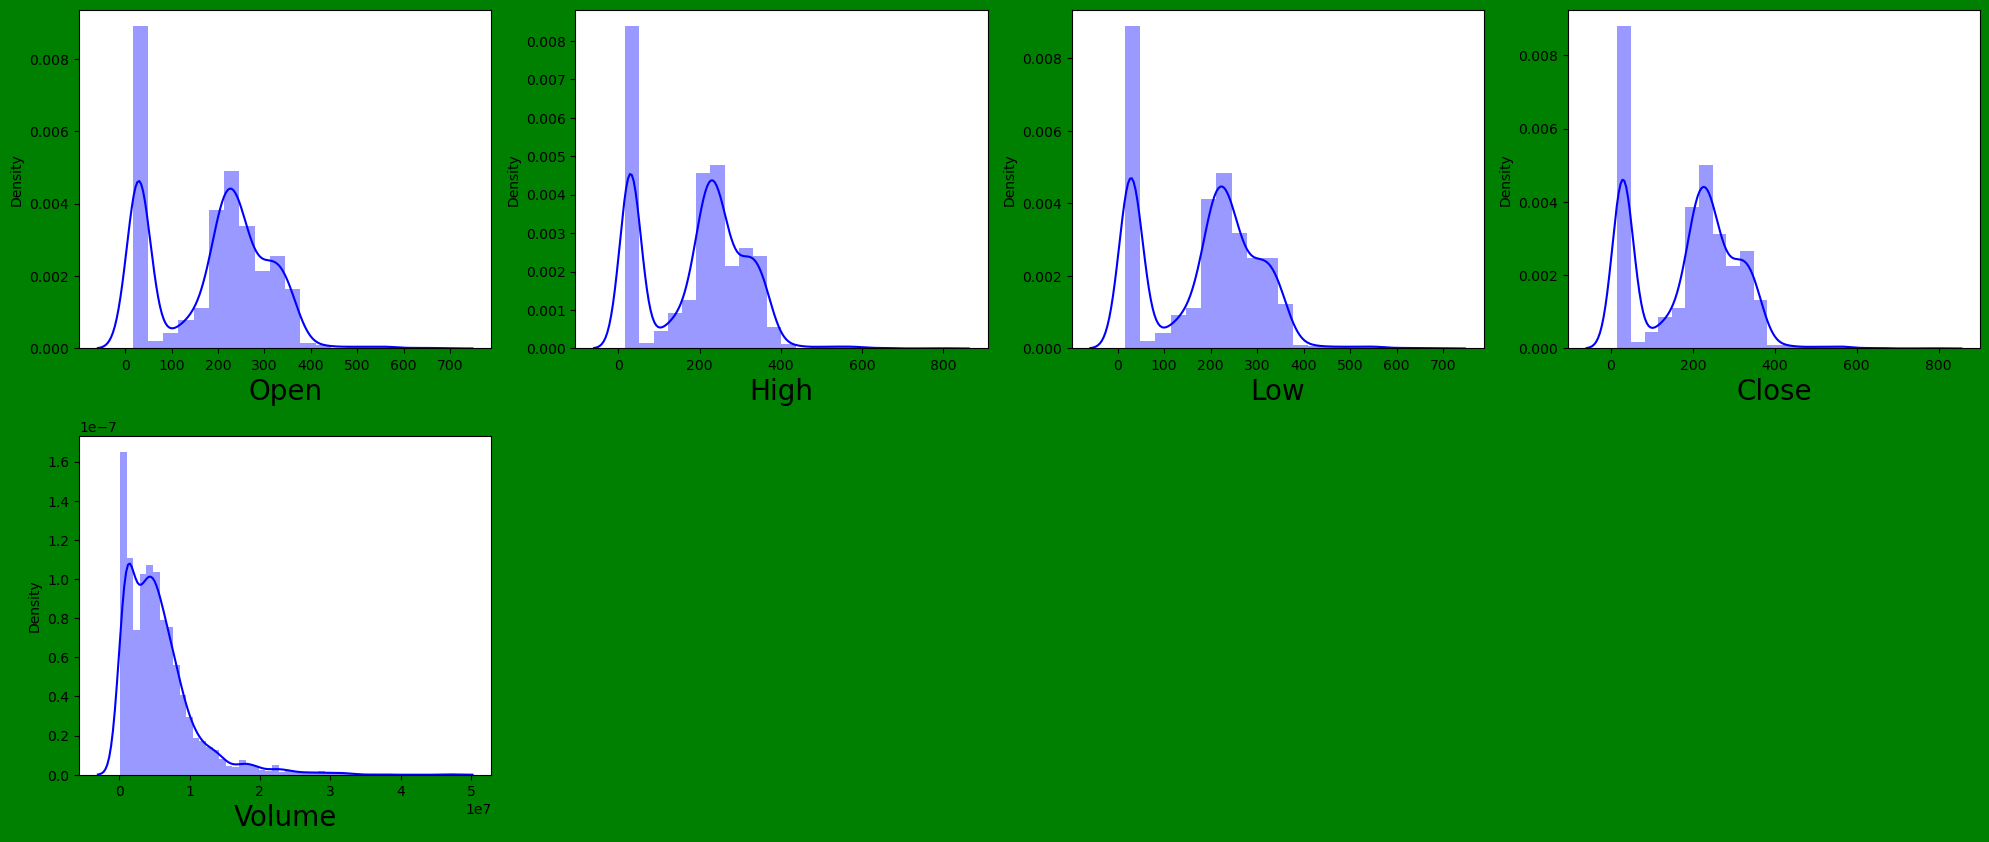

In [111]:
plt.figure(figsize = (20, 25), facecolor = 'green')

pl = 1
for column in df:
    if pl<=18:
        ax = plt.subplot(6,4, pl)
        sns.distplot(df[column], color = 'b')
        plt.xlabel(column, fontsize = 20)
    pl+=1  
    
    plt.tight_layout()
        

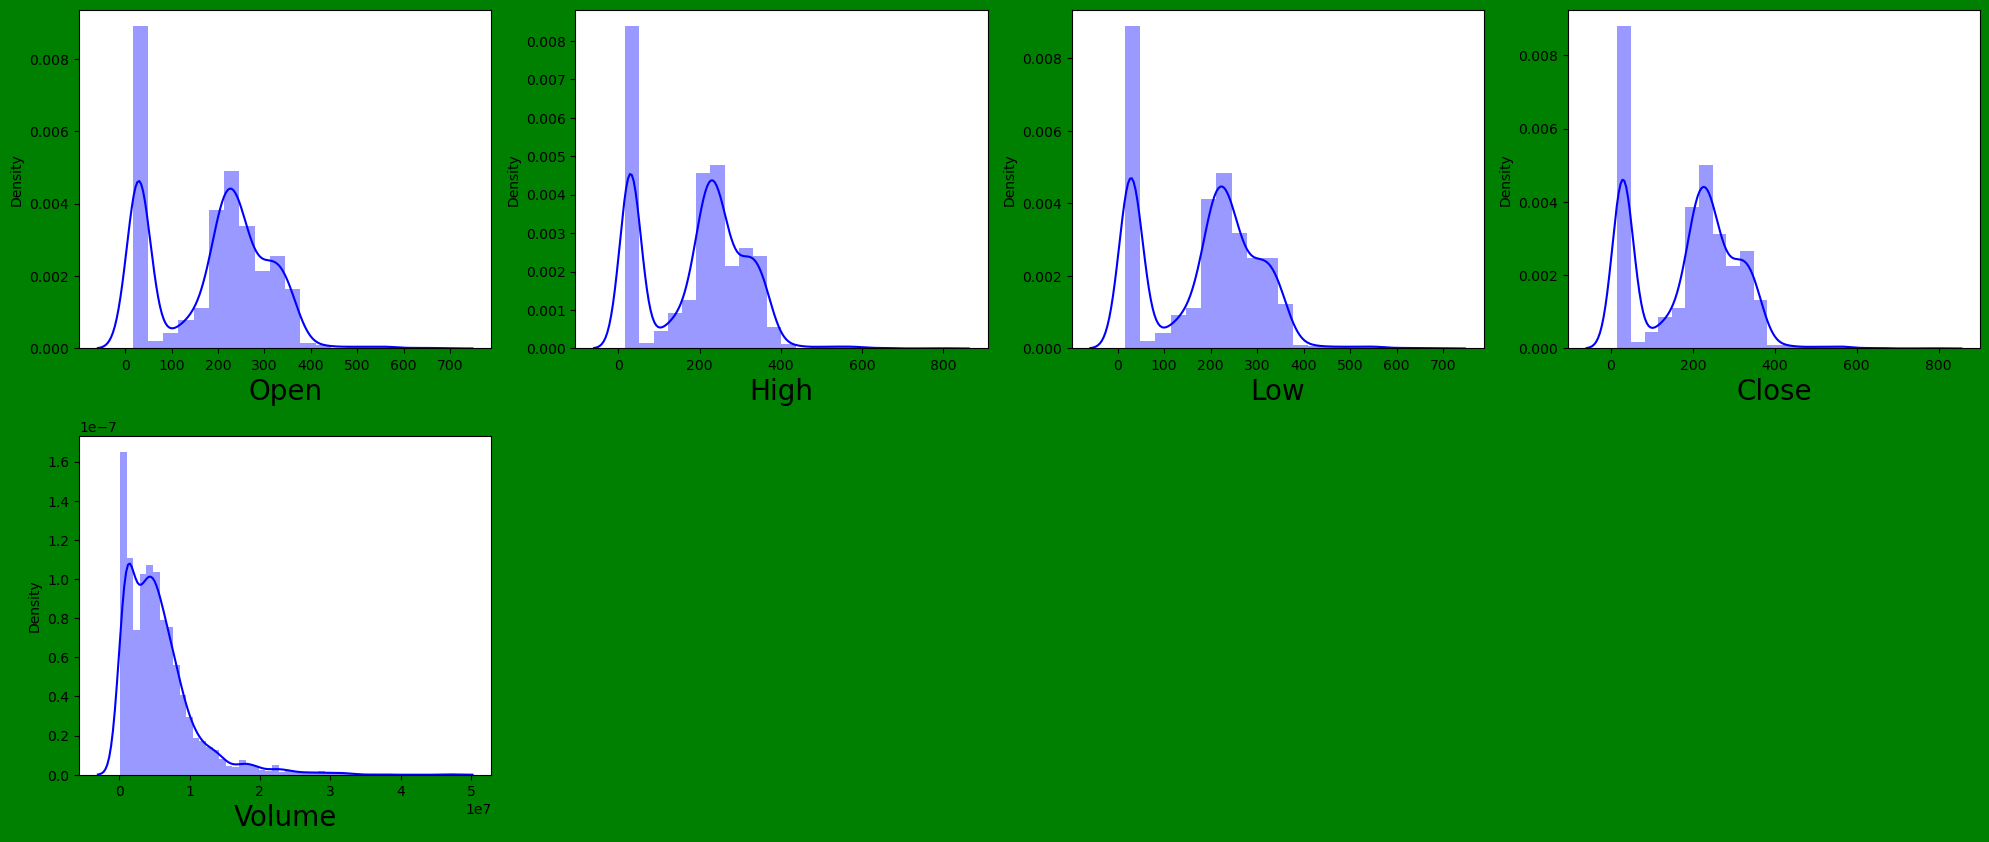

In [121]:
plt.figure(figsize = (20, 25), facecolor = 'green')

pl = 1
for column in df1:
    if pl<=18:
        ax = plt.subplot(6,4, pl)
        sns.distplot(df1[column], color = 'b')
        plt.xlabel(column, fontsize = 20)
    pl+=1  
    
    plt.tight_layout()
        

Except Volume which has right skewness , other column are almost normally distributed

In [114]:
df1.skew()

Open     -0.166733
High     -0.168561
Low      -0.163947
Close    -0.165594
Volume    1.177040
dtype: float64

This confirm that column Volume is skewed. the normal range is [-0.5, 0.5]

In [115]:
# removing skewness
df1['Volume'] = np.cbrt(df1['Volume'])

In [116]:
df1.skew()

Open     -0.166733
High     -0.168561
Low      -0.163947
Close    -0.165594
Volume   -0.049348
dtype: float64

Skweness has been removed

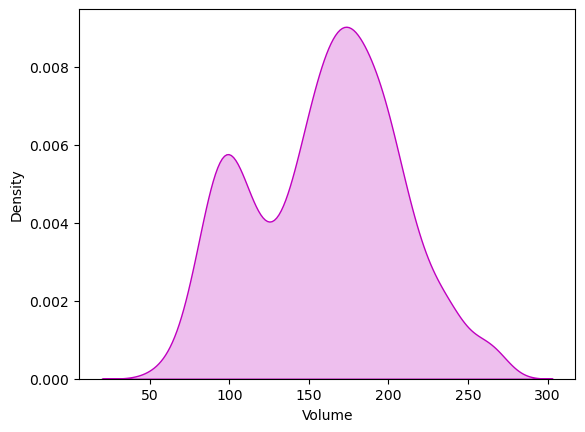

In [117]:
# confirming with displot that skewness has been removed

sns.distplot(df1['Volume'], color = 'm', kde_kws = {'shade':True}, hist = False)
plt.show()

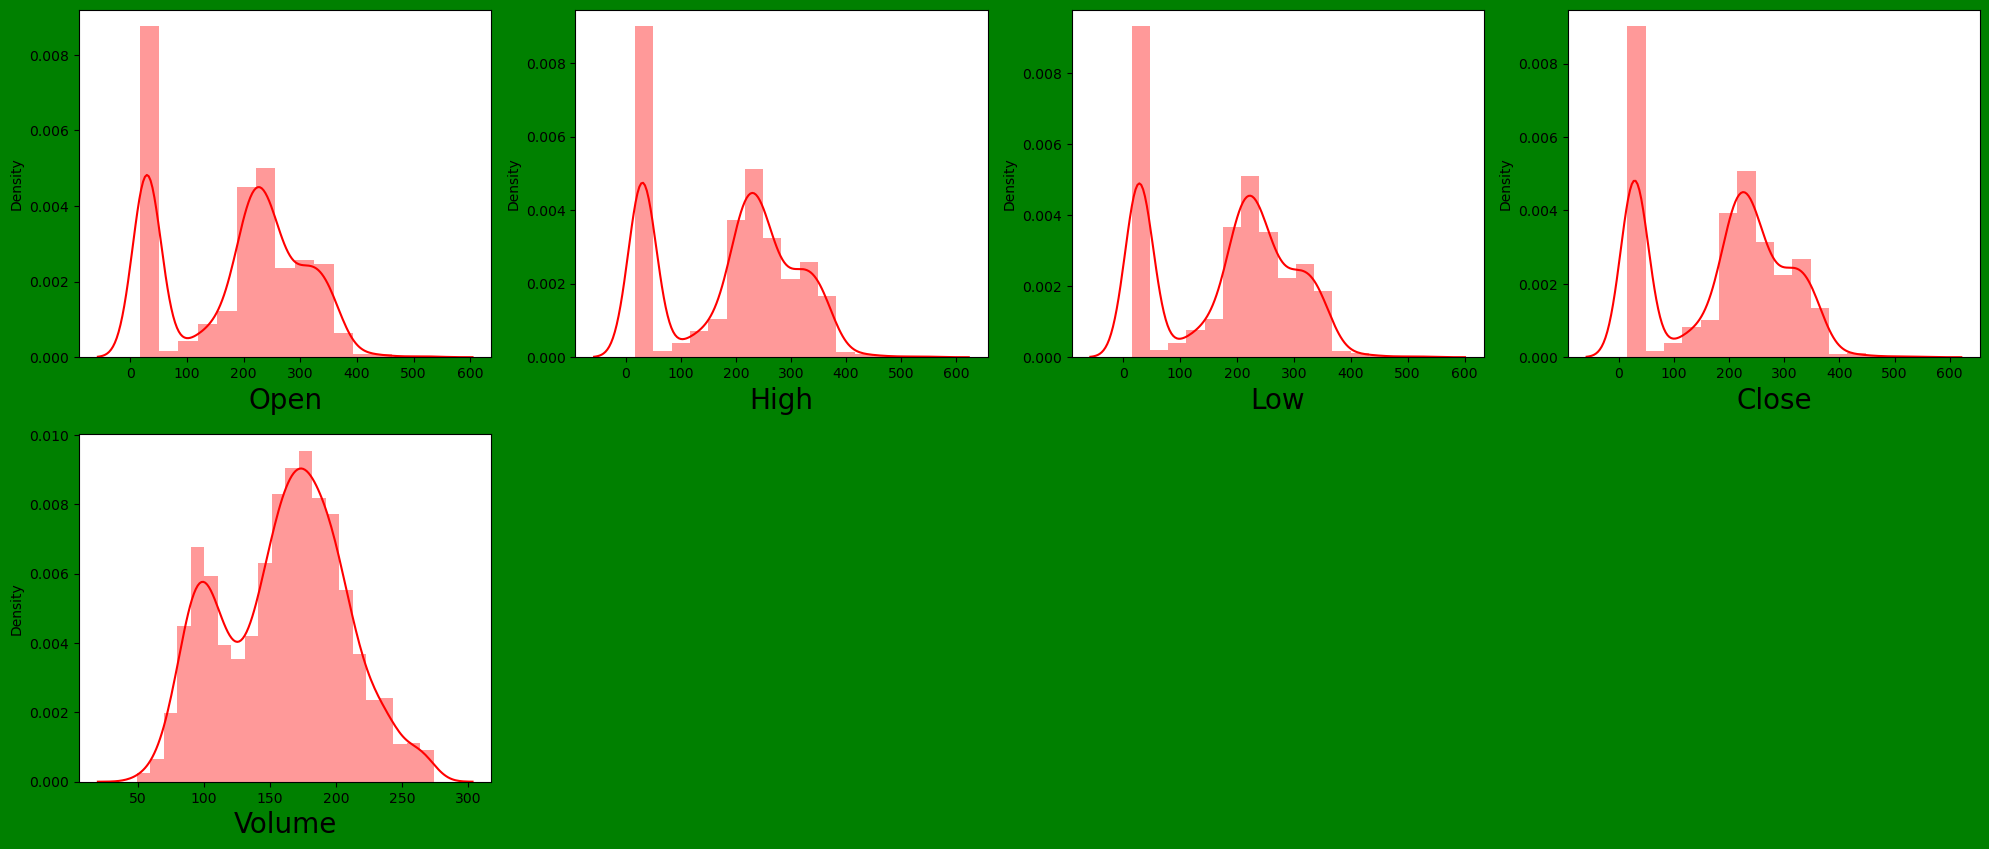

In [122]:
plt.figure(figsize = (20, 25), facecolor = 'green')

pl = 1
for column in df1:
    if pl<=18:
        ax = plt.subplot(6,4, pl)
        sns.distplot(df1[column], color = 'r')
        plt.xlabel(column, fontsize = 20)
    pl+=1  
    
    plt.tight_layout()
        

In [123]:
# checking the correlation

df1.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999636,0.999586,0.999110,0.691035
High,0.999636,1.000000,0.999573,0.999648,0.696482
Low,0.999586,0.999573,1.000000,0.999629,0.684846
Close,0.999110,0.999648,0.999629,1.000000,0.690879
Volume,0.691035,0.696482,0.684846,0.690879,1.000000


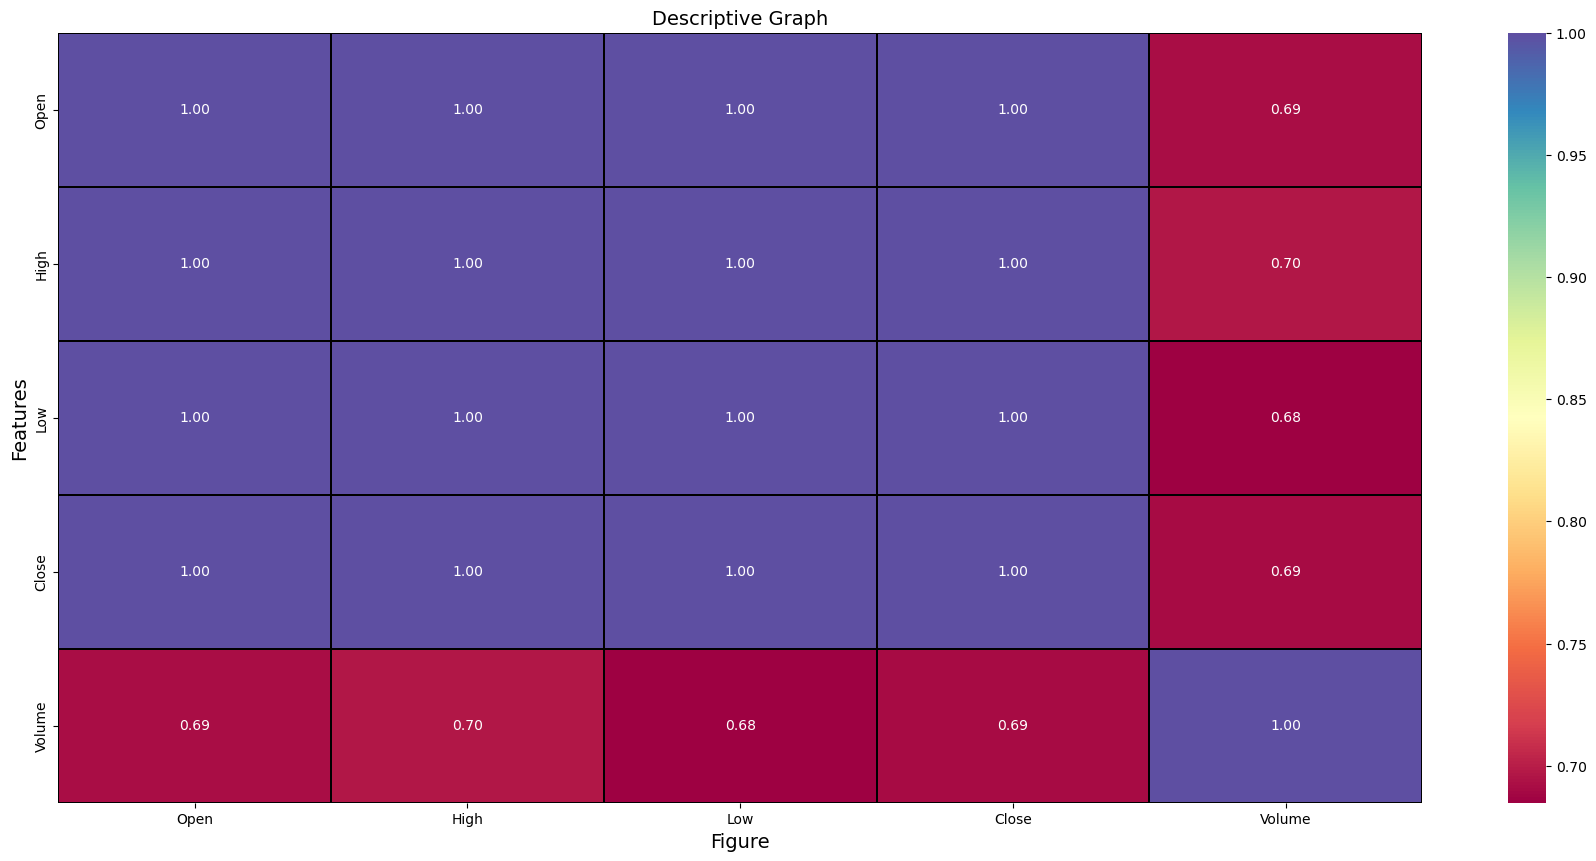

In [124]:
# heatmap for correlation

plt.figure(figsize = (22,10))

sns.heatmap(df1.corr(), annot = True, fmt = '0.2f', linewidth = 0.2, linecolor = 'black', cmap = 'Spectral')
plt.xlabel('Figure', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.title('Descriptive Graph', fontsize = 14)
plt.show()


Classifying features according to their correlation with the target variable ('Close' here). this helps to maintain 
the feature with the highest correlation with the target in caes of multicolinearity

In [125]:
df1.corr().Close.sort_values()

Volume    0.690879
Open      0.999110
Low       0.999629
High      0.999648
Close     1.000000
Name: Close, dtype: float64

Text(0.5, 1.0, 'correlation between features and label')

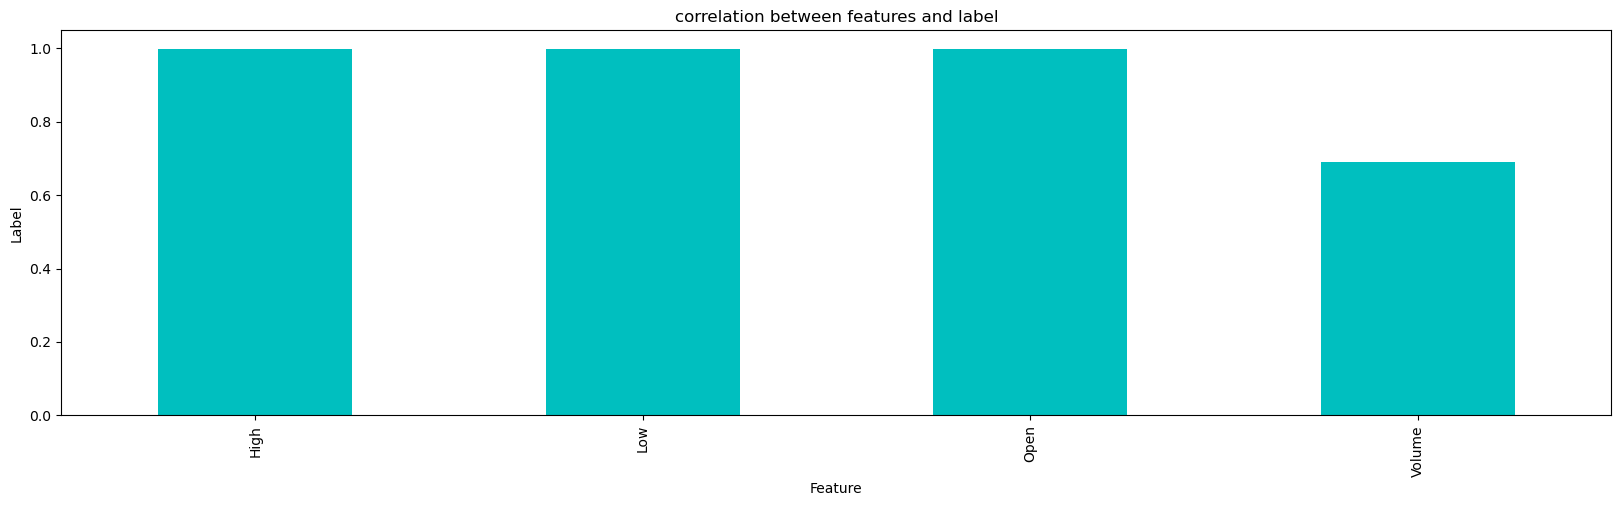

In [132]:
# visualising correlation between features and labels using barplot

plt.figure(figsize = (20,5))

df1.corr()['Close'].sort_values(ascending = False).drop('Close').plot(kind = 'bar', color = 'c')
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('Label', fontsize = 10)
plt.title('correlation between features and label')

Separating features and target

In [133]:
x = df1.drop('Close', axis = 'columns')
y = df1['Close']

In [134]:
print('features dimension: ', x.shape)
print('target dimension: ', y.shape) # here it gives the number of rows as it is a single column

features dimension:  (2360, 4)
target dimension:  (2360,)


This is to confirm that features aand target have the same number of row, for data consistency 

In [ ]:
features scaling using standard scalarisation

In [139]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Open,High,Low,Volume
0,-1.420294,-1.374432,-1.427526,2.286419
1,-1.361700,-1.328357,-1.377020,2.120674
2,-1.368517,-1.366611,-1.403588,0.905467
3,-1.385776,-1.390584,-1.417267,0.274109
4,-1.411664,-1.416937,-1.442520,0.652018
...,...,...,...,...
2355,2.397372,2.422375,2.393889,2.194817
2356,2.573326,2.535524,2.572237,1.620021
2357,2.987281,2.985228,2.950064,2.140248
2358,2.796138,2.796760,2.830552,1.705938


In [140]:
# finding variance inflation in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif["Features"] = x.columns
vif 

,VIF Values,Features
0,1781.725322,Open
1,2279.581318,High
2,1992.663985,Low
3,2.745962,Volume


Here we can see that there is severe multicolinearity issue. Open is strongly correlated with, High, Low,and Volume
same thing for High and Low

But we cannot drop High (which is the highest VIF, so the one to normally be removed) because of two things:
1 - it represents a high proportion of the dataset, so removing it will cause a serious data lost problem 
2 - we can say this is not a real multicolnearity, because in stock market, these features are always correlated,
so it is a real life situation.

## #Modeling

In [142]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn .metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

train test split

In [144]:
# finding the best random state

maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('Max r2_score is: ', maxAccu, 'at Random_state: ', maxRs)


Max r2_score is:  0.9997657983118071 at Random_state:  139


In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRs)

rand_state is a kind of seed value that will pick the data randamly from train and test data.

so, we are looking for a random_state value which will randomly split data into 
4 parts (x_train, x_test, y_train, y_test) n such a way that we have the best/max accuracy for the model and 
to also avoid biased model

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge


In [191]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_LR))
print('Mean squared error: ', mean_squared_error(y_test, pred_LR))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.9997657983118071
R2_score on training data:  99.96885789174415
Mean absolute error:  1.2351269522235016
Mean squared error:  3.2404593774054686
Root mean squared error:  1.8001276003121192


R2_score (99.97%) is very high because of overfitting (assumingly due to Empirical multicolinearity 
observed earlier ). we will check this using cross validation method, as this gives the real performance/accuracy of the model

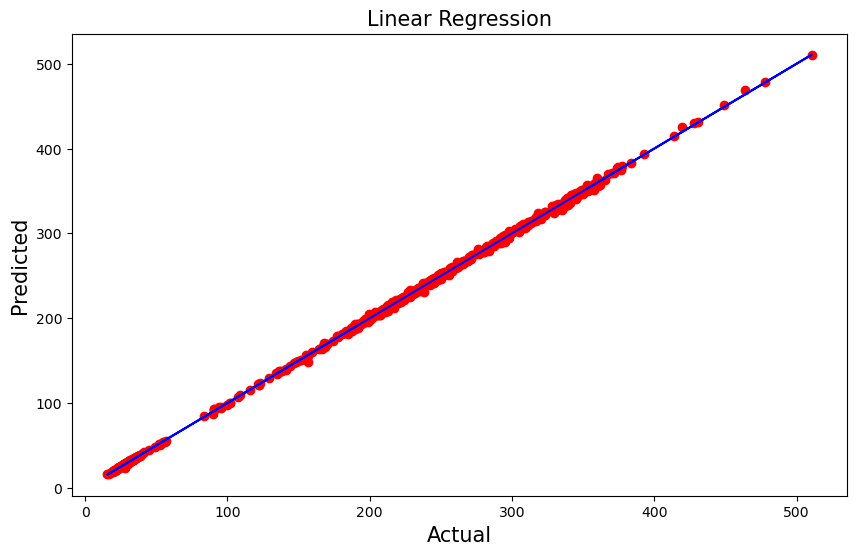

In [153]:
plt.figure(figsize = (10, 6))
plt.scatter(x = pred, y = y_test, color = 'r')  # scatter plot in matplotlib
plt.plot(pred, pred, color = 'b') # line plot in matplotlib
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted', fontsize = 15)
plt.title('Linear Regression', fontsize = 15)
plt.show()

# plt. means matplotlib

In [190]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
pred_RF = RF.predict(x_test)
pred_train = RF.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RF))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_RF))
print('Mean squared error: ', mean_squared_error(y_test, pred_RF))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_RF)))

R2_score:  0.9993168221625048
R2_score on training data:  99.99096206910347
Mean absolute error:  1.8310842544915251
Mean squared error:  9.452579300466892
Root mean squared error:  3.074504724417722


In [189]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_knn))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_knn))
print('Mean squared error: ', mean_squared_error(y_test, pred_knn))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score:  0.9980863399942105
R2_score on training data:  99.86966994069122
Mean absolute error:  3.1268451632768364
Mean squared error:  26.47776606041334
Root mean squared error:  5.145655066210068


In [188]:
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
pred_GB = GB.predict(x_test)
pred_train = GB.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GB))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_GB))
print('Mean squared error: ', mean_squared_error(y_test, pred_GB))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_GB)))

R2_score:  0.9992220159086426
R2_score on training data:  99.97211182442103
Mean absolute error:  1.9660820946139312
Mean squared error:  10.76433677213507
Root mean squared error:  3.280904870936533


In [187]:
las = Lasso()
las.fit(x_train, y_train)
pred_las = las.predict(x_test)
pred_train = las.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_las))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_las))
print('Mean squared error: ', mean_squared_error(y_test, pred_las))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_las)))

R2_score:  0.9991159078008095
R2_score on training data:  99.91552633962546
Mean absolute error:  2.5509924657199177
Mean squared error:  12.23246885819963
Root mean squared error:  3.4974946544919305


In [210]:
rdr = Ridge()
rdr.fit(x_train, y_train)
pred_rdr = rdr.predict(x_test)
pred_train = rdr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rdr))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_rdr))
print('Mean squared error: ', mean_squared_error(y_test, pred_rdr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_rdr)))

TypeError: solve() got an unexpected keyword argument 'sym_pos'

In [201]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_dtr))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_dtr))
print('Mean squared error: ', mean_squared_error(y_test, pred_dtr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score:  0.9988549128064642
R2_score on training data:  100.0
Mean absolute error:  2.4288139491525427
Mean squared error:  15.843645547009128
Root mean squared error:  3.98040771115336


In [203]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_svr))
print('Mean squared error: ', mean_squared_error(y_test, pred_svr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  0.951902353982245
R2_score on training data:  97.10104695494026
Mean absolute error:  9.949096433738005
Mean squared error:  665.4882348284702
Root mean squared error:  25.797058646839375


In [205]:
from sklearn.ensemble import ExtraTreesRegressor

etr =  ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_etr))
print('R2_score on training data: ', r2_score(y_train, pred_train)*100)
print('Mean absolute error: ', mean_absolute_error(y_test, pred_etr))
print('Mean squared error: ', mean_squared_error(y_test, pred_etr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_etr)))

R2_score:  0.9994760755292457
R2_score on training data:  99.99999999982727
Mean absolute error:  1.734715866087572
Mean squared error:  7.249119241657057
Root mean squared error:  2.6924188458813494


Cross validation

In [173]:
from sklearn.model_selection import cross_val_score

In [192]:
# checking cv for Linear Regression

score = cross_val_score(LR,x,y, cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('The difference between R2 score and cross validation score is: ', (r2_score(y_test, pred_LR) - score.mean())*100)


[0.99303154 0.9996625  0.99369573 0.99880959 0.99686683]
0.9964132385330841
The difference between R2 score and cross validation score is:  0.3352559778723063


This that the linear model wasn’t overfitting, because the difference between r score and cv sscore is very less
(0.3 =0.003)

In [193]:
# checking cv for Random Forest Regressor

score = cross_val_score(RF,x,y, cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('The difference between R2 score and cross validation score is: ', (r2_score(y_test, pred_RF) - score.mean())*100)


[0.59968342 0.96820486 0.98948156 0.99747187 0.91929136]
0.8948266140320765
The difference between R2 score and cross validation score is:  10.44902081304283


In [195]:
# checking cv for Random Forest Regressor

score = cross_val_score(knn,x,y, cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('The difference between R2 score and cross validation score is: ', (r2_score(y_test, pred_knn) - score.mean())*100)


[-0.99585327  0.95590816  0.96354932  0.99251573  0.89661013]
0.5625460152464667
The difference between R2 score and cross validation score is:  43.554032474774374


In [196]:
# checking cv for Random Forest Regressor

score = cross_val_score(GB,x,y, cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('The difference between R2 score and cross validation score is: ', (r2_score(y_test, pred_GB) - score.mean())*100)


[0.42441929 0.97239829 0.98821837 0.99645547 0.91726204]
0.8597506920088593
The difference between R2 score and cross validation score is:  13.947132389978323


In [197]:
# checking cv for Random Forest Regressor

score = cross_val_score(las,x,y, cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('The difference between R2 score and cross validation score is: ', (r2_score(y_test, pred_las) - score.mean())*100)


[0.73431494 0.99896578 0.98437577 0.99559537 0.9898096 ]
0.9406122909950179
The difference between R2 score and cross validation score is:  5.850361680579164


In [202]:
# checking cv for Random Forest Regressor

score = cross_val_score(dtr,x,y, cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('The difference between R2 score and cross validation score is: ', (r2_score(y_test, pred_dtr) - score.mean())*100)


[0.62851907 0.96507183 0.9805136  0.99481414 0.9192135 ]
0.8976264296213451
The difference between R2 score and cross validation score is:  10.122848318511913


In [204]:
# checking cv for Random Forest Regressor

score = cross_val_score(svr,x,y, cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('The difference between R2 score and cross validation score is: ', (r2_score(y_test, pred_svr) - score.mean())*100)


[-31.58070871   0.9258226    0.97203527   0.87684117   0.14838183]
-5.731525567871338
The difference between R2 score and cross validation score is:  668.3427921853582


Here we are getting negative cv score, meaning that the model performs worst on the unseen data. 
This means the model has not learned well on the training data.

If all the models give negative cv, we would have to redo from scratch EDA/features engineering/features selection 

In [206]:
# checking cv for Random Forest Regressor

score = cross_val_score(etr,x,y, cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('The difference between R2 score and cross validation score is: ', (r2_score(y_test, pred_etr) - score.mean())*100)


[0.62289218 0.99904972 0.99141304 0.99778274 0.91899551]
0.9060266375647824
The difference between R2 score and cross validation score is:  9.344943796446326
